In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
fert = pd.read_csv('./Data-processed/FertilizerData.csv')
crop = pd.read_csv('./Data-processed/CropData.csv')

In [3]:
fert.head()

Unnamed: 0         Crop   N   P   K   pH
0           0         rice  80  40  40  5.5
1           3        maize  80  40  20  5.5
2           5     chickpea  40  60  80  5.5
3          12  kidneybeans  20  60  20  5.5
4          13   pigeonpeas  20  60  20  5.5

In [4]:
fert.drop('Unnamed: 0',axis = 1,inplace = True)

In [5]:
fert.head()

Crop   N   P   K   pH
0         rice  80  40  40  5.5
1        maize  80  40  20  5.5
2     chickpea  40  60  80  5.5
3  kidneybeans  20  60  20  5.5
4   pigeonpeas  20  60  20  5.5

In [7]:
fert.describe()

N           P           K         pH
count   22.000000   22.000000   22.000000  22.000000
mean    50.454545   45.681818   48.181818   5.409091
std     36.315715   32.634172   51.698426   0.590326
min     20.000000   10.000000   10.000000   4.000000
25%     20.000000   20.000000   20.000000   5.500000
50%     30.000000   40.000000   30.000000   5.500000
75%     80.000000   60.000000   50.000000   5.500000
max    120.000000  125.000000  200.000000   6.500000

In [8]:
fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Text(0, 0.5, 'Nitrogen (mg/g)')

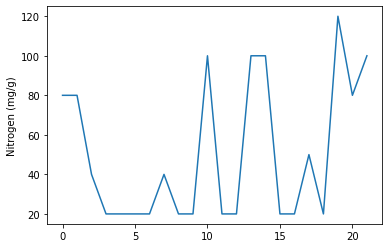

In [12]:
plt.plot(fert["N"])
plt.ylabel('Nitrogen (mg/g)')

Text(0, 0.5, 'Phosphorus (mg/g)')

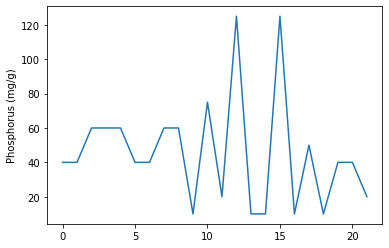

In [13]:
plt.plot(fert["P"])
plt.ylabel('Phosphorus (mg/g)')

Text(0, 0.5, 'Potassium (mg/g)')

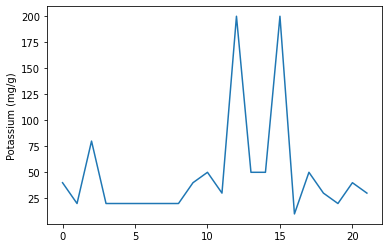

In [14]:
plt.plot(fert["K"])
plt.ylabel('Potassium (mg/g)')

<AxesSubplot:>

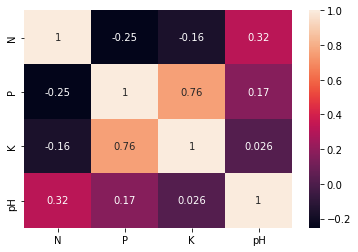

In [16]:
sns.heatmap(fert.corr(),annot=True)

In [29]:
r_fert = fert
crop.head()

Unnamed: 0  temperature   humidity        ph    rainfall label
0           0    20.879744  82.002744  6.502985  202.935536  rice
1           1    21.770462  80.319644  7.038096  226.655537  rice
2           2    23.004459  82.320763  7.840207  263.964248  rice
3           3    26.491096  80.158363  6.980401  242.864034  rice
4           4    20.130175  81.604873  7.628473  262.717340  rice

In [30]:
crop.drop('Unnamed: 0', axis = 1, inplace = True)

In [31]:
crop.head()

temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice

Adding randomness in the range of tolerance

In [32]:
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,len(crop)):
    t_crop = crop.label.iloc[i]
    
    N = r_fert[r_fert['Crop'] == t_crop]["N"].iloc[0] + random.randint(-20,20)
    P = r_fert[r_fert['Crop'] == t_crop]["P"].iloc[0] + random.randint(-5,20)
    K = r_fert[r_fert['Crop'] == t_crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    
    temp = temp.append(d,ignore_index = True)

In [33]:
temp

N   P   K
0      83  54  42
1      86  57  35
2      77  35  43
3      87  53  37
4      76  51  41
...   ...  ..  ..
2195   89  19  34
2196   82  26  28
2197   90  37  30
2198   98  22  33
2199  101  22  27

[2200 rows x 3 columns]

Merging Crop and fertilizer data

In [34]:
crop['N'] = temp['N']
crop['P'] = temp['P']
crop['K'] = temp['K']

In [35]:
crop

temperature   humidity        ph    rainfall   label    N   P   K
0       20.879744  82.002744  6.502985  202.935536    rice   83  54  42
1       21.770462  80.319644  7.038096  226.655537    rice   86  57  35
2       23.004459  82.320763  7.840207  263.964248    rice   77  35  43
3       26.491096  80.158363  6.980401  242.864034    rice   87  53  37
4       20.130175  81.604873  7.628473  262.717340    rice   76  51  41
...           ...        ...       ...         ...     ...  ...  ..  ..
2195    26.774637  66.413269  6.780064  177.774507  coffee   89  19  34
2196    27.417112  56.636362  6.086922  127.924610  coffee   82  26  28
2197    24.131797  67.225123  6.362608  173.322839  coffee   90  37  30
2198    26.272418  52.127394  6.758793  127.175293  coffee   98  22  33
2199    23.603016  60.396475  6.779833  140.937041  coffee  101  22  27

[2200 rows x 8 columns]

In [37]:
crop = crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [38]:
crop.to_csv("./Data-processed/crop_recommendation.csv",index=False)

In [40]:
# Checking if everything went fine
df = pd.read_csv('./Data-processed/crop_recommendation.csv')

In [41]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  83  54  42    20.879744  82.002744  6.502985  202.935536  rice
1  86  57  35    21.770462  80.319644  7.038096  226.655537  rice
2  77  35  43    23.004459  82.320763  7.840207  263.964248  rice
3  87  53  37    26.491096  80.158363  6.980401  242.864034  rice
4  76  51  41    20.130175  81.604873  7.628473  262.717340  rice